# Wine Quality Analysis

## 1. Data Exploration

### 1A. Distribution of Wine Quality Scores

We start by exploring the dataset to understand the distribution of quality scores for red and white wines.  
This will help us see if there are any noticeable differences between the two types of wine.

We will:
- Load the datasets
- Check basic statistics and distributions
- Compare the quality distributions between red and white wines
- Visualize the distributions using histograms and KDE plots

Red Wine Quality Distribution:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

White Wine Quality Distribution:
count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


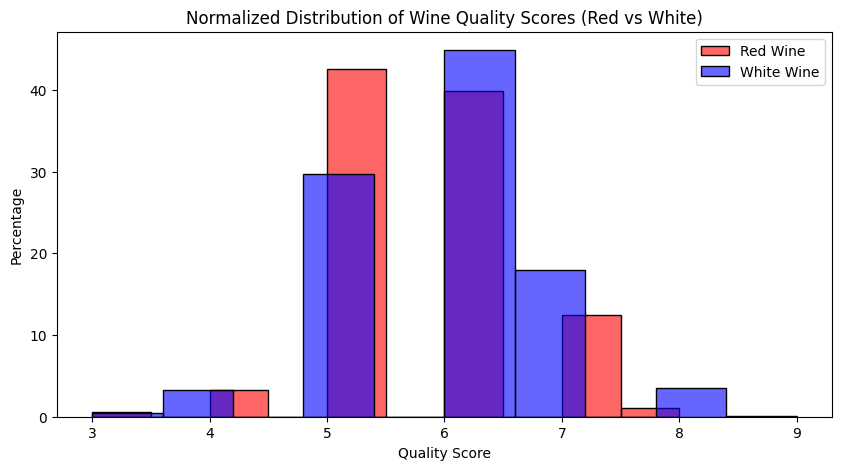

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Check basic statistics
print("Red Wine Quality Distribution:")
print(red_wine["quality"].describe())
print("\nWhite Wine Quality Distribution:")
print(white_wine["quality"].describe())

# Plot the distribution of wine quality
plt.figure(figsize=(10, 5))
sns.histplot(red_wine["quality"], bins=10, kde=False, color="red", label="Red Wine", alpha=0.6, stat="percent")
sns.histplot(white_wine["quality"], bins=10, kde=False, color="blue", label="White Wine", alpha=0.6, stat="percent")

plt.title("Normalized Distribution of Wine Quality Scores (Red vs White)")
plt.xlabel("Quality Score")
plt.ylabel("Percentage")
plt.legend()
plt.show()

### Red Wine Quality Distribution
The distribution of red wine quality is summarized as follows:
- **Count**: 1599 samples
- **Mean**: 5.64
- **Standard Deviation**: 0.81
- **Minimum Quality**: 3
- **25th Percentile (Q1)**: 5
- **Median (50th Percentile)**: 6
- **75th Percentile (Q3)**: 6
- **Maximum Quality**: 8

This distribution indicates that most red wines have a quality score around 5 and 6, with a few higher-quality wines reaching up to 8. The mean quality score for red wines is 5.64, suggesting that the overall quality is relatively low to moderate.

---

### White Wine Quality Distribution
The distribution of white wine quality is summarized as follows:
- **Count**: 4898 samples
- **Mean**: 5.88
- **Standard Deviation**: 0.89
- **Minimum Quality**: 3
- **25th Percentile (Q1)**: 5
- **Median (50th Percentile)**: 6
- **75th Percentile (Q3)**: 6
- **Maximum Quality**: 9

White wines have a mean quality score of 5.88, which is slightly higher than red wines. The distribution is very similar to red wines, with most of the quality scores around 5 to 6, though the maximum score can go up to 9. This suggests that white wines may have a slightly broader range of quality scores than red wines.

---

### Comparison of Red and White Wine Quality Distributions
- **Mean Quality**: White wines have a slightly higher mean quality score (5.88) compared to red wines (5.64).
- **Range**: Both types of wine have a similar range of quality scores, with red wines having a maximum of 8 and white wines reaching 9.
- **Skewness**: Both distributions are centered around a quality score of 6, indicating that most wines are rated in the middle of the quality scale, with a few outliers towards the higher end.

These observations suggest that while red and white wines share similarities in quality distribution, white wines may have a slightly higher average quality.

## 1B. Discretising Alcohol Content

To understand the relationship between alcohol content and wine quality we will create a categorial variable ('alcohol_cat'). This labels white and red wine seperately into categories **low**, **mid**, **high**.

- **Low**: Alcohol < (mean - std)
- **Mid**: Between (mean - std) and (mean + std)
- **High**: Alcohol > (mean + std)

This will help analyse how alcohol levels relates to quality.

In [14]:
# Discretise alcohol content for red wine
red_mean = red_wine['alcohol'].mean()
red_std = red_wine['alcohol'].std()

def alcohol_category_red(alcohol):
    if alcohol < red_mean - red_std:
        return 'low'
    elif alcohol > red_mean + red_std:
        return 'high'
    else:
        return 'mid'

red_wine['alcohol_cat'] = red_wine['alcohol'].apply(alcohol_category_red)

# Discretise alcohol content for white wine
white_mean = white_wine['alcohol'].mean()
white_std = white_wine['alcohol'].std()

def alcohol_category_white(alcohol):
    if alcohol < white_mean - white_std:
        return 'low'
    elif alcohol > white_mean + white_std:
        return 'high'
    else:
        return 'mid'

white_wine['alcohol_cat'] = white_wine['alcohol'].apply(alcohol_category_white)

# check value counts for each category
print("Red Wine Alcohol Categories:\n", red_wine['alcohol_cat'].value_counts())
print("\nWhite Wine Alcohol Categories:\n", white_wine['alcohol_cat'].value_counts())

Red Wine Alcohol Categories:
 alcohol_cat
mid     1125
high     280
low      194
Name: count, dtype: int64

White Wine Alcohol Categories:
 alcohol_cat
mid     3121
high     932
low      845
Name: count, dtype: int64


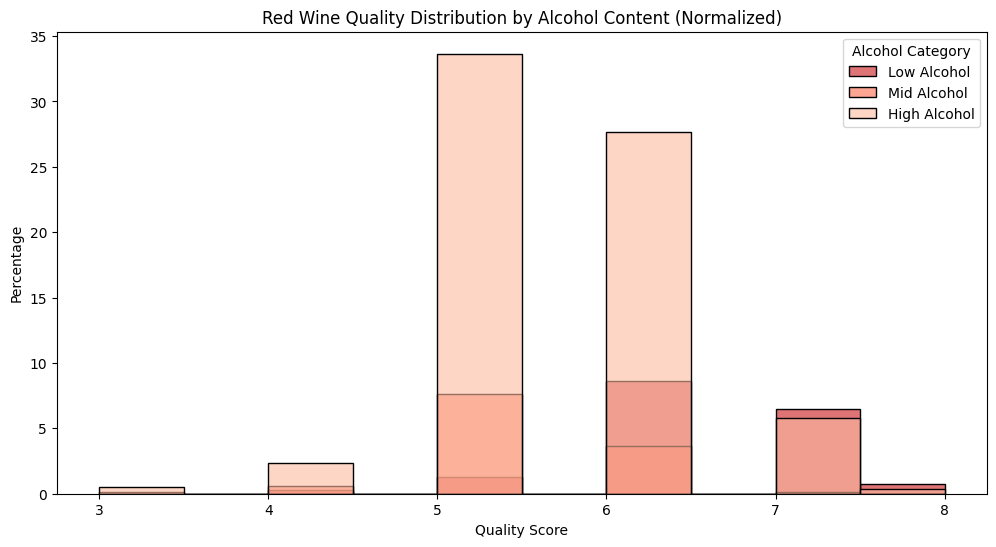

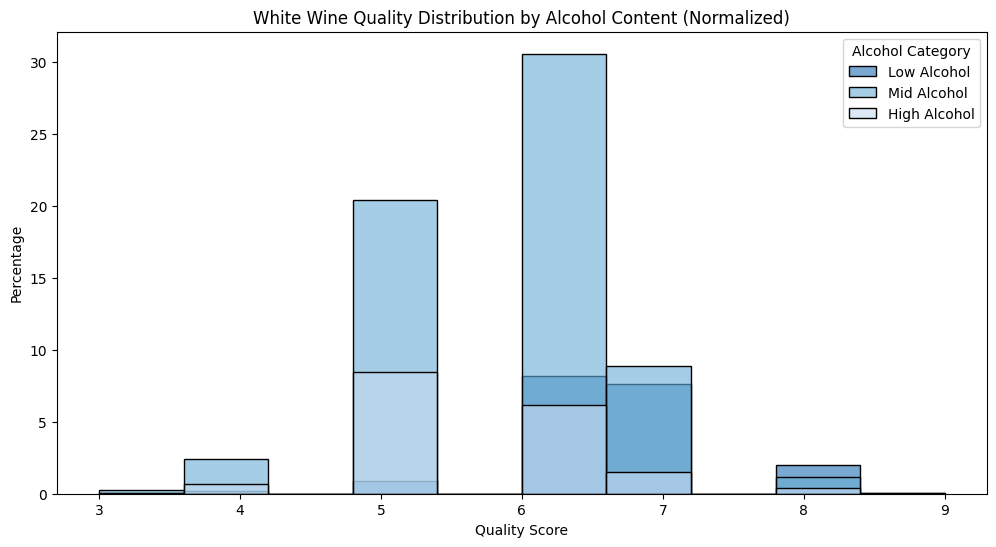

In [ ]:
# Plot quality distribution for red wine by alcohol category
plt.figure(figsize=(12, 6))
sns.histplot(data=red_wine, x="quality", hue="alcohol_cat", bins=10, kde=False, palette="Reds", alpha=0.6, stat="percent")
plt.title("Red Wine Quality Distribution by Alcohol Content (Normalized)")
plt.xlabel("Quality Score")
plt.ylabel("Percentage")
plt.legend(title="Alcohol Category", labels=["Low Alcohol", "Mid Alcohol", "High Alcohol"])  # legend labels
plt.show()

# Plot quality distribution for white wine by alcohol category
plt.figure(figsize=(12, 6))
sns.histplot(data=white_wine, x="quality", hue="alcohol_cat", bins=10, kde=False, palette="Blues", alpha=0.6, stat="percent")
plt.title("White Wine Quality Distribution by Alcohol Content (Normalized)")
plt.xlabel("Quality Score")
plt.ylabel("Percentage")
plt.legend(title="Alcohol Category", labels=["Low Alcohol", "Mid Alcohol", "High Alcohol"])  # legend labels
plt.show()

### 1C. Conclusions On the Relationship Between Alcohol Content and Quality

#### **1. Red Wine**
- **High Alcohol Content**:
  - A higher percentage of red wines with **high alcohol content** have quality scores of **7 or 8**, indicating that higher alcohol content is positively associated with higher quality.
  - The peak of the distribution for high alcohol wines is shifted toward higher quality scores compared to the other categories.

- **Low Alcohol Content**:
  - Red wines with **low alcohol content** are more likely to have lower quality scores, with the majority falling in the **5 or 6** range.
  - This suggests that low alcohol content is associated with lower quality.

- **Mid Alcohol Content**:
  - Red wines with **mid alcohol content** show a more balanced distribution, with peaks around quality scores of **6 and 7**.
  - This indicates that mid alcohol wines can vary widely in quality.

---

#### **2. White Wine**
- **High Alcohol Content**:
  - Similar to red wine, white wines with **high alcohol content** have a higher percentage of wines with quality scores of **7 or 8**.
  - The distribution for high alcohol wines is skewed toward higher quality scores.

- **Low Alcohol Content**:
  - White wines with **low alcohol content** are more likely to have quality scores of **5 or 6**, indicating a negative association between low alcohol content and quality.

- **Mid Alcohol Content**:
  - White wines with **mid alcohol content** show a broader distribution, with peaks around quality scores of **6 and 7**, similar to red wines.

---

#### **3. General Observations**
- **Positive Correlation**:
  - For both red and white wines, there is a clear positive relationship between alcohol content and quality. Wines with higher alcohol content are more likely to have higher quality scores.
  
- **Low Alcohol Wines**:
  - Wines with low alcohol content tend to have lower quality scores, suggesting that alcohol content may play a role in enhancing the flavor profile or balance of the wine.

- **Mid Alcohol Wines**:
  - Mid alcohol wines show a more balanced distribution of quality scores, indicating that they can vary widely in quality.

---

### Supporting Evidence from Graphs
1. **Red Wine Graph**:
   - The normalized histogram for red wine shows that the percentage of wines with high alcohol content increases as quality scores rise, peaking at scores of 7 and 8.
   - Conversely, low alcohol wines have a higher percentage at lower quality scores (5 and 6).

2. **White Wine Graph**:
   - The normalized histogram for white wine shows a similar trend, with high alcohol wines peaking at higher quality scores (7 and 8) and low alcohol wines peaking at lower scores (5 and 6).

---

### Conclusion
The graphs provide strong evidence of a **positive relationship between alcohol content and wine quality** for both red and white wines. Higher alcohol content is generally associated with higher quality scores, while lower alcohol content is linked to lower quality scores. This trend is consistent across both types of wine.

